In [1]:
import numpy as np
from numpy.linalg import norm


In [2]:
def cos_sim(i, j):
    return np.dot(i, j.T)/(np.linalg.norm(i)*np.linalg.norm(j))

def s(w, A, B):
    c_a = cos_sim(w, A)
    c_b = cos_sim(w, B)
    mean_A = np.mean(c_a, axis=-1)
    mean_B = np.mean(c_b, axis=-1)
    return mean_A - mean_B

In [3]:
def weat_score(X, Y, A, B):
    
    s_X = s(X, A, B)
    s_Y = s(Y, A, B)

    mean_X = np.mean(s_X)
    mean_Y = np.mean(s_Y)
    
    std_dev = np.std(np.concatenate([s_X, s_Y], axis=0))
    
    return  (mean_X-mean_Y)/std_dev

In [4]:
import os

with open(os.getenv('HOME')+'/aiffel/weat/synopsis.txt', 'r') as file:
    for i in range(20):
        print(file.readline(), end='')

사운드 엔지니어 상우(유지태 분)는 치매에 걸린 할머니(백성희 분)와
 젊은 시절 상처한 한 아버지(박인환 분), 고모(신신애 분)와 함께 살고 있다.
 어느 겨울 그는 지방 방송국 라디오 PD 은수(이영애 분)를 만난다.
 자연의 소리를 채집해 틀어주는 라디오 프로그램을 준비하는 은수는 상우와 녹음 여행을 떠난다.
 자연스레 가까워지는 두 사람은 어느 날, 은수의 아파트에서 밤을 보낸다.
 너무 쉽게 사랑에 빠진 두 사람... 상우는 주체할 수 없을 정도로 그녀에게 빨려든다.
 그러나 겨울에 만난 두 사람의 관계는 봄을 지나 여름을 맞이하면서 삐걱거린다.
 이혼 경험이 있는 은수는 상우에게 결혼할 생각이 없다며 부담스러운 표정을 내비친다.
 "어떻게 사랑이 변하니?..."라고 묻는 상우에게 은수는 그저 "헤어져" 라고 단호하게 말한다.
 영원히 변할 것 같지 않던 사랑이 변하고, 그 사실을 받아들이지 못하는 상우는 어찌 할 바를 모른다.
 은수를 잊지 못하는 상우는 미련과 집착의 감정을 이기지 못하고 서울과 강릉을 오간다.
유사 이래 연령, 성별, 빈부의 차이와 정치적인 입장을 불문하고 일거에 국민을 통합해 온 '애국심'이라는 성역에 일침을 가하는 다큐멘터리. 재작년 전국 민족민주 유가족협의회의 장기농성을 다룬 인상적인 다큐멘터리 <민들레>를 만들었던 독립영화집단 '빨간 눈사람'이 우리 사회 구석구석을 발빠르게 돌아다니며 애국심과 민족주의가 강요되는 현장을 발굴하여 카메라에 담았다. 박홍 서강대 명예총장, 이도형 '한국논단' 발행인, 축구해설자 신문선, 홍세화, 박노해 등 사회 각계의 '스타'들이 등장해 저마다의 확고한 신념을 성토한다. 감독 이경순과 최하동하는 이 작품을 위해 3년간 백여 명을 인터뷰했다고 한다. 2001 올해의 독립영화상 수상.
 민족과 국가란 공동체에서 부단히 권력과 부를 얻는 자, 나아가 민족과 국가란 공동체에서 얻은 신분과 부귀를 영원히 그의 자손에게 대물림하려는 자, 그래서 민족과 국가란 공동체를 부단히 유지해야만 하는 자, 따라서

# STEP 1. 형태소 분석기를 이용하여 품사가 명사인 경우 해당 단어를 추출하기

In [5]:
from konlpy.tag import Okt

def to_tokenized(filename):
    okt = Okt()
    tokenized = []
    with open(os.getenv('HOME') + '/aiffel/weat/' + filename, 'r') as file:
        while True:
            line = file.readline()
            if not line: break
            words = okt.pos(line, stem=True, norm=True)
            res = []
            for w in words:
                if w[1] in ["Noun"]:      
                    res.append(w[0])    # 명사일 때만 tokenized 에 저장
            tokenized.append(res)
    return tokenized

In [6]:
tokenized = to_tokenized('synopsis.txt')
print(len(tokenized))

71156


# STEP 2. 추출된 결과로 embedding model 만들기

In [7]:
from gensim.models import Word2Vec

# tokenized에 담긴 데이터를 가지고 나만의 Word2Vec을 생성
model = Word2Vec(tokenized, vector_size=100, window=5, min_count=3, sg=0)  

훈련이 잘 되었는지 확인해 봅니다.

In [8]:
model.wv.most_similar(positive=['사랑'])

[('첫사랑', 0.7068762183189392),
 ('애정', 0.6843658089637756),
 ('행복', 0.683525562286377),
 ('진심', 0.6808487176895142),
 ('운명', 0.6786841750144958),
 ('연애', 0.675493061542511),
 ('우정', 0.6731275916099548),
 ('가슴', 0.6729742288589478),
 ('감정', 0.6702259182929993),
 ('아픔', 0.6643404364585876)]

In [9]:
model.wv.most_similar(positive=['연극'])

[('시나리오', 0.8993991017341614),
 ('영감', 0.8903468251228333),
 ('영화감독', 0.8815070986747742),
 ('캐스팅', 0.8785440325737),
 ('오페라', 0.8729634284973145),
 ('각색', 0.8707478642463684),
 ('데뷔', 0.8692490458488464),
 ('영화로', 0.865605354309082),
 ('배우', 0.863792359828949),
 ('소설', 0.858873188495636)]

# STEP 3. target, attribute 단어 셋 만들기

이전 스텝에서는 TF-IDF를 사용해서 단어 셋을 만들었습니다. 이 방법으로도 어느 정도는 대표 단어를 잘 선정할 수 있습니다. 그러나 TF-IDF가 높은 단어를 골랐음에도 불구하고 중복되는 단어가 발생하는 문제가 있었습니다. 개념축을 표현하는 단어가 제대로 선정되지 않은 것은 WEAT 계산 결과에 악영향을 미칩니다.
TF-IDF를 적용했을 때의 문제점이 무엇인지 지적 가능하다면 그 문제점을 지적하고 스스로 방법을 개선하여 대표 단어 셋을 구축해 보기 바랍니다. TF-IDF 방식을 쓰더라도 중복된 단어를 잘 제거하면 여전히 유용한 방식이 될 수 있습니다.

In [10]:
def read_token(file_name):
    okt = Okt()
    result = []
    with open(os.getenv('HOME')+'/aiffel/weat/'+file_name, 'r') as fread: 
        print(file_name, '파일을 읽고 있습니다.')
        while True:
            line = fread.readline() 
            if not line: break 
            tokenlist = okt.pos(line, stem=True, norm=True) 
            for word in tokenlist:
                if word[1] in ["Noun"]:
                    result.append((word[0])) 
    return ' '.join(result)

In [11]:
art_txt = 'synopsis_art.txt'
gen_txt = 'synopsis_gen.txt'

In [12]:
art = read_token(art_txt)
gen = read_token(gen_txt)

synopsis_art.txt 파일을 읽고 있습니다.
synopsis_gen.txt 파일을 읽고 있습니다.


In [142]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform([art, gen])

print(X.shape)

(2, 41082)


In [143]:
print(vectorizer.vocabulary_['영화'])
print(vectorizer.get_feature_names()[23976])

23976
영화


In [144]:
m1 = X[0].tocoo()   # art를 TF-IDF로 표현한 sparse matrix를 가져옵니다. 
m2 = X[1].tocoo()   # gen을 TF-IDF로 표현한 sparse matrix를 가져옵니다. 

w1 = [[i, j] for i, j in zip(m1.col, m1.data)]
w2 = [[i, j] for i, j in zip(m2.col, m2.data)]

w1.sort(key=lambda x: x[1], reverse=True)   #art를 구성하는 단어들을 TF-IDF가 높은 순으로 정렬합니다. 
w2.sort(key=lambda x: x[1], reverse=True)   #gen을 구성하는 단어들을 TF-IDF가 높은 순으로 정렬합니다. 

print('예술영화를 대표하는 단어들:')
for i in range(100):
    print(vectorizer.get_feature_names()[w1[i][0]], end=', ')

print('\n')
    
print('일반영화를 대표하는 단어들:')
for i in range(100):
    print(vectorizer.get_feature_names()[w2[i][0]], end=', ')

예술영화를 대표하는 단어들:
그녀, 자신, 시작, 위해, 사랑, 사람, 영화, 친구, 남자, 가족, 이야기, 마을, 사건, 마음, 세상, 아버지, 아이, 엄마, 모든, 여자, 대한, 서로, 과연, 다시, 시간, 아들, 소녀, 아내, 다른, 사이, 영화제, 세계, 사실, 하나, 점점, 남편, 감독, 여행, 인생, 발견, 모두, 순간, 우리, 가장, 마지막, 생활, 아빠, 모습, 통해, 죽음, 기억, 비밀, 학교, 음악, 한편, 소년, 생각, 도시, 명의, 사고, 결혼, 전쟁, 때문, 위기, 이제, 최고, 이자, 과거, 일상, 경찰, 상황, 간다, 미국, 결심, 운명, 현실, 관계, 지금, 단편, 여인, 하루, 이름, 이후, 준비, 인간, 감정, 만난, 국제, 처음, 충격, 살인, 누구, 동안, 존재, 그린, 어머니, 연인, 계속, 동생, 작품, 

일반영화를 대표하는 단어들:
자신, 그녀, 영화제, 위해, 사람, 시작, 국제, 영화, 친구, 사랑, 남자, 이야기, 대한, 서울, 여자, 사건, 남편, 아이, 가족, 아버지, 다른, 마을, 시간, 엄마, 아들, 모든, 단편, 마음, 사실, 다시, 세계, 모습, 작품, 통해, 생각, 서로, 세상, 발견, 감독, 아내, 관계, 소녀, 사이, 하나, 우리, 애니메이션, 때문, 여성, 죽음, 과연, 점점, 인간, 생활, 한편, 결혼, 상황, 모두, 기억, 명의, 소년, 여행, 가장, 간다, 순간, 이제, 도시, 비밀, 학교, 과거, 가지, 이자, 경찰, 마지막, 미국, 동안, 전쟁, 주인공, 대해, 존재, 현실, 연출, 사고, 살인, 일상, 어머니, 계속, 사회, 인생, 다큐멘터리, 부문, 섹스, 최고, 바로, 동생, 의도, 하루, 위기, 계획, 정체, 한국, 

### 타겟 단어 선정에 변화 주기

tf-idf에 의해 대표 단어를 뽑아본 결과 상단에서 의미 없이 겹치는 단어들이 많이 나타나는게 보인다.

아마도 tf가 너무 높아서 그렇게 되는 것 같다. 

해당 단어들이 크게 의미 없고 weat의 두 축을 구성하는데에 최대한 분리된 단어를 사용하는 것이 좋다고 하였으므로 겹치지 않는 단어만 선택하도록 하였다.\

그리고 주제가 훨씬 많아졌으므로 n을 크게 잡았다.

In [156]:
n = 60
w_len = 1000
w1_, w2_ = [], []
for i in range(w_len):
    w1_.append(vectorizer.get_feature_names()[w1[i][0]])
    w2_.append(vectorizer.get_feature_names()[w2[i][0]])

# w1에만 있고 w2에는 없는, 예술영화를 잘 대표하는 단어를 15개 추출한다.
target_art, target_gen = [], []
for i in range(w_len):
    if (w1_[i] not in w2_) and (w1_[i] in model.wv): target_art.append(w1_[i])
    if len(target_art) == n: break 

# w2에만 있고 w1에는 없는, 일반영화를 잘 대표하는 단어를 15개 추출한다.
for i in range(w_len):
    if (w2_[i] not in w1_) and (w2_[i] in model.wv): target_gen.append(w2_[i])
    if len(target_gen) == n: break

In [157]:
print(target_art)

['북한', '황제', '레오', '아담', '진심', '무작정', '줄리', '뮤지션', '피아노', '외면', '선언', '메리', '카페', '단편영화', '뜻밖', '폭탄', '로마', '다니엘', '가면', '영화감독', '요괴', '실화', '수현', '한나', '알리', '자식', '흑인', '취재', '방황', '간직', '고수', '말리', '세계대전', '감행', '매혹', '명성', '지망', '동행', '병사', '무렵', '센터', '유학', '여섯', '믿음', '용서', '전하', '제인', '제이', '일곱', '수녀', '이스라엘', '메이', '갈수록', '번의', '생애', '케빈', '토미', '예측', '선고', '미국인']


In [158]:
print(target_gen)

['페스티벌', '다큐', '이미지', '정사', '아시아나', '인디애니페스트', '마사지', '비디오', '불륜', '최강', '에피소드', '개발', '상영', '애니', '출장', '만화', '남성', '유부녀', '현대', '악몽', '희생', '아시아', '기술', '포럼', '필름', '투쟁', '시각', '킬러', '육체', '미장센', '인터넷', '화면', '거기', '욕구', '강도', '바이러스', '일당', '암살', '결과', '퀴어', '특별', '매우', '현상', '느낌', '축제', '마이크', '디지털', '제거', '경제', '최근', '컴퓨터', '아저씨', '저주', '원인', '에리', '얼마나', '캐릭터', '거대', '공원', '아키']


### 타겟 단어 선정에 변화 주기 결과

이전보다는 나아진것 같긴하지만 여전히 몇몇단어가 의문이긴하다..

In [29]:
genre_txt = ['synopsis_SF.txt', 'synopsis_family.txt', 'synopsis_show.txt', 'synopsis_horror.txt', 'synopsis_etc.txt', 
             'synopsis_documentary.txt', 'synopsis_drama.txt', 'synopsis_romance.txt', 'synopsis_musical.txt', 
             'synopsis_mystery.txt', 'synopsis_crime.txt', 'synopsis_historical.txt', 'synopsis_western.txt', 
             'synopsis_adult.txt', 'synopsis_thriller.txt', 'synopsis_animation.txt', 'synopsis_action.txt', 
             'synopsis_adventure.txt', 'synopsis_war.txt', 'synopsis_comedy.txt', 'synopsis_fantasy.txt']
genre_name = ['SF', '가족', '공연', '공포(호러)', '기타', '다큐멘터리', '드라마', '멜로로맨스', '뮤지컬', '미스터리', '범죄', '사극', '서부극(웨스턴)',
         '성인물(에로)', '스릴러', '애니메이션', '액션', '어드벤처', '전쟁', '코미디', '판타지']

In [30]:
genre = []
for file_name in genre_txt:
    genre.append(read_token(file_name))

synopsis_SF.txt 파일을 읽고 있습니다.
synopsis_family.txt 파일을 읽고 있습니다.
synopsis_show.txt 파일을 읽고 있습니다.
synopsis_horror.txt 파일을 읽고 있습니다.
synopsis_etc.txt 파일을 읽고 있습니다.
synopsis_documentary.txt 파일을 읽고 있습니다.
synopsis_drama.txt 파일을 읽고 있습니다.
synopsis_romance.txt 파일을 읽고 있습니다.
synopsis_musical.txt 파일을 읽고 있습니다.
synopsis_mystery.txt 파일을 읽고 있습니다.
synopsis_crime.txt 파일을 읽고 있습니다.
synopsis_historical.txt 파일을 읽고 있습니다.
synopsis_western.txt 파일을 읽고 있습니다.
synopsis_adult.txt 파일을 읽고 있습니다.
synopsis_thriller.txt 파일을 읽고 있습니다.
synopsis_animation.txt 파일을 읽고 있습니다.
synopsis_action.txt 파일을 읽고 있습니다.
synopsis_adventure.txt 파일을 읽고 있습니다.
synopsis_war.txt 파일을 읽고 있습니다.
synopsis_comedy.txt 파일을 읽고 있습니다.
synopsis_fantasy.txt 파일을 읽고 있습니다.


In [133]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(genre)

print(X.shape)

(21, 42191)


In [134]:
# 장르들의 tf-idf 행렬
m = [X[i].tocoo() for i in range(X.shape[0])]

w = [[[i, j] for i, j in zip(mm.col, mm.data)] for mm in m]

for i in range(len(w)):
    w[i].sort(key=lambda x: x[1], reverse=True)

# attribute 단어 선정 변화 주기

장르들에 대한 단어축을 고를때에도 스텝과는 다르게 상위의 단어들을 고르지 않는 선택을 하도록하려고 한다.

먼저 wt라는 행렬의 각 i행에 장르들의 tf-idf 각 행 상위 100개 단어씩을 넣는다.

그 다음 attribute를 골라낼때 i행을 제외한 나머지 행에 해당 단어의 다른 문서 존재여부를 측정하고 없을 시에만 attribute에 추가한다.

In [136]:
wt = []
for i in range(len(w)):
    wi = list(map(lambda x: x[0], w[i][:100]))
    wt.append(wi)

In [137]:

attributes = []
for i in range(len(w)):
    print(genre_name[i], end=': ')
    attr = []
    j = 0
    while (len(attr) < n):
        check = False # 다른 문서에서 나타났는지 체크
        for k in range(len(w)):
            if i != k:
                if w[i][j][0] in wt[k]:
                    check = True
                    break # 다른 문서에 나타났으면 check flag를 True로 해주고 반복문을 종료한다.
       
        if not check and vectorizer.get_feature_names()[w[i][j][0]] in model.wv:    
            attr.append(vectorizer.get_feature_names()[w[i][j][0]])
            print(vectorizer.get_feature_names()[w[i][j][0]], end=', ')
        j += 1
    attributes.append(attr)
    print()

SF: 외계, 행성, 시스템, 생명체, 스타크, 리플리, 과학자, 파괴, 켈빈, 컨트, 수퍼맨, 외계인, 분파, 연구, 개발, 
가족: 아주르, 낙타, 씨제이, 동구, 슈이트, 마갈, 미아, 펠리칸, 벤트, 케이시, 크리스마스, 최호, 혜지, 유나, 테리, 
공연: 실황, 올레, 오텔로, 리골레토, 백작, 프레, 베르디, 비바, 콘서트, 백작부인, 반니, 아리아, 미노, 차이코프스키, 라다, 
공포(호러): 악령, 좀비, 저주, 일행, 악몽, 귀신, 저택, 현상, 사라, 영혼, 살인마, 기운, 그날, 치료, 분홍신, 
기타: 뉴미디어, 아시아나, 이미지, 상영작, 지하철, 청소년, 유럽, 포럼, 메트로, 단편영화, 실험영화, 대화, 거리, 광주, 프라이드, 
다큐멘터리: 다큐, 다큐멘터리, 기록, 카메라, 투쟁, 인디다큐페스티발, 지금, 현재, 문화, 건축, 인터뷰, 중국, 변화, 운동, 자연, 
드라마: 시절, 고향, 청년, 자기, 이상, 선택, 전주, 이유, 동네, 그것, 자리, 오늘, 선생님, 소개, 대신, 
멜로로맨스: 애인, 남자친구, 선배, 커플, 고백, 동거, 이혼, 시아버지, 만남, 은밀, 첫사랑, 직장, 언니, 형부, 매일, 
뮤지컬: 뮤지컬, 에스메랄다, 충무로, 모차르트, 니웨, 바흐, 페뷔스, 프롤, 모도, 제루샤, 샤오캉, 데이비, 팬텀, 크리스틴, 노트르담, 
미스터리: 민혁, 미스터리, 방독면, 소설, 랭던, 몰카, 혼란, 지목, 누군가, 거미숲, 작가, 사이먼, 누구, 의사, 수연, 
범죄: 한길수, 프랭크, 파푸아, 금고, 테러범, 강도, 마샨, 거래, 달러, 검사, 철중, 도미, 사기꾼, 범행, 폭력, 
사극: 조선, 신기전, 아가멤논, 황제, 루안, 하선, 윤서, 트로이, 세자, 허균, 노준, 채선, 신재효, 히파티아, 권력, 
서부극(웨스턴): 서부, 보안관, 벌린, 카우보이, 그레이프바인, 헨리, 개릿, 무법자, 프린트, 마적, 태구, 현상금, 분노, 버질, 랜던, 
성인물(에로): 에피소드, 유이, 욕구불만, 손님, 유우

### attribute 단어 선정 변화 주기 결과

기존 target 분류시보다는 attribute 분류시에 언뜻 보아 더 그럴듯한 결과가 나온것 같다.

# STEP 4. WEAT score 계산과 시각화

In [159]:
matrix = [[0 for _ in range(len(genre_name))] for _ in range(len(genre_name))]

In [160]:
X = np.array([model.wv[word] for word in target_art])
Y = np.array([model.wv[word] for word in target_gen])

for i in range(len(genre_name)-1):
    for j in range(i+1, len(genre_name)):
        A = np.array([model.wv[word] for word in attributes[i]])
        B = np.array([model.wv[word] for word in attributes[j]])
        matrix[i][j] = weat_score(X, Y, A, B)

In [161]:
for i in range(len(genre_name)-1):
    for j in range(i+1, len(genre_name)):
        print(genre_name[i], genre_name[j],matrix[i][j])

SF 가족 -0.56552386
SF 공연 -0.3678907
SF 공포(호러) -0.43066102
SF 기타 0.20590636
SF 다큐멘터리 0.21878889
SF 드라마 -0.3357068
SF 멜로로맨스 -0.3476088
SF 뮤지컬 -0.21036345
SF 미스터리 -0.31598803
SF 범죄 -0.39920232
SF 사극 -0.39986905
SF 서부극(웨스턴) -0.618924
SF 성인물(에로) -0.20692573
SF 스릴러 -0.2999582
SF 애니메이션 -0.2650519
SF 액션 -0.47773224
SF 어드벤처 -0.68702525
SF 전쟁 -0.39035696
SF 코미디 -0.39586526
SF 판타지 -0.5757579
가족 공연 0.6002992
가족 공포(호러) 0.22568898
가족 기타 0.7876646
가족 다큐멘터리 0.6496463
가족 드라마 0.54619986
가족 멜로로맨스 0.004047526
가족 뮤지컬 0.6863882
가족 미스터리 0.61390597
가족 범죄 0.45336658
가족 사극 0.6199959
가족 서부극(웨스턴) 0.40722054
가족 성인물(에로) 0.35891557
가족 스릴러 0.3832678
가족 애니메이션 0.78509647
가족 액션 0.39286602
가족 어드벤처 0.3819931
가족 전쟁 0.39579368
가족 코미디 0.90416056
가족 판타지 0.28945515
공연 공포(호러) -0.1458366
공연 기타 0.7958616
공연 다큐멘터리 0.5416932
공연 드라마 -0.11256488
공연 멜로로맨스 -0.25124958
공연 뮤지컬 0.7656853
공연 미스터리 -0.0017758565
공연 범죄 -0.0089888405
공연 사극 0.3209156
공연 서부극(웨스턴) -0.28541142
공연 성인물(에로) -0.04126219
공연 스릴러 -0.052425355
공연 애니메이션 0.2521612
공연 액션 0.09

<AxesSubplot:>

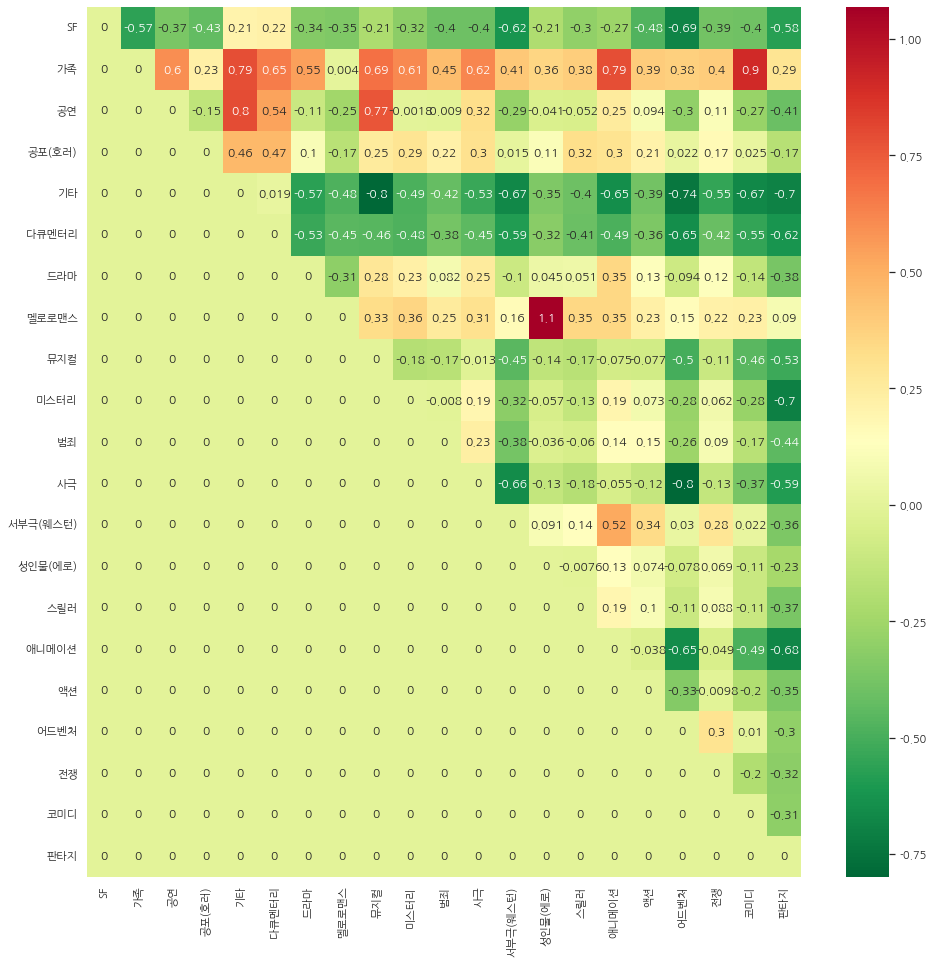

In [162]:
import matplotlib.pyplot as plt 
import seaborn as sns

np.random.seed(0)

# 한글 지원 폰트
sns.set(font='NanumGothic')

# 마이너스 부호 
plt.figure(figsize=(16,16))
plt.rcParams['axes.unicode_minus'] = False

ax = sns.heatmap(matrix, xticklabels=genre_name, yticklabels=genre_name, annot=True,  cmap='RdYlGn_r')
ax

개인적으로는 target의 중심단어 선택은 조금 더 좋아졌고 attribute의 중심단어 선택은 매우 좋아졌다고 생각한다.

그리고 결과적으로 weat 시각화 그래프를 통해 더 극단적인 값들이 많아졌음이 보인다.

크게 보면

가족, 공포영화, 멜로 로맨스는 대체로 행에서 양수의 값 열에서 음수의 값을 보이므로 예술영화에 가깝게 분류된것 같고

나머지는 대체로 상업영화성이 있는것으로 분류 된것 같다. 특히 sf와 다큐멘터리가 강하다.

멜로로맨스와 성인물(에로)를 생각해보면 거의 한끝차이 느낌인것 같기도한데 이거에 따라서 가장강하게 표현된점이 특이하다.



## 회고

해석을 함에 있어 굉장히 헷갈림이 많았던 과제였다. 아무래도 세상의 통계치가 내가 느끼는것과 많이 다르기 때문이 아닐까....